In [3]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [83]:
tot_je = pd.read_csv('./magazine/final/tot_jenny_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [84]:
tot_je['ADFN_2'] = tot_je['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

### top50 리스트 생성

In [85]:
top500 = pd.read_csv('./tot_jenny_top500.csv', sep='|', encoding = 'utf-8')

In [86]:
top500

,word,count
0,제니,9270
1,귀엽다,2144
2,예쁘다,1817
3,사랑,805
4,얼굴,671
...,...,...
495,마무리,35
496,위드,35
497,온,34
498,존재,34


In [87]:
top50 = []
for i in range(50):
    top50.append(top200.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '중', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '사진', '고급', '라이브', '치마', '자체', '댓글', '룩', '오늘', '분위기', '항상']


### top100

In [88]:
top100 = []
for i in range(100):
    top100.append(top200.loc[i, 'word'])
    
print(len(top100))
print(top100[:91])

100
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '중', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '사진', '고급', '라이브', '치마', '자체', '댓글', '룩', '오늘', '분위기', '항상', '입덕', '세상', '전', '제일', '한국', '좋다', '인간', '썸네일', '의상', '애기', '연출', '레전드', '포인트', '부분', '진심', '그녀', '블랙', '쿠마', '보', '외모', '매치', '솔로', '날', '겁나', '멋있다', '나도', '요즘', '스타일링', '앞', '마음', '다시', '가수', '웃기', '대', '메이크업', '레드', '소화', '그룹', '코디', 'YG', '워']


In [89]:
t200 = []
for i in range(len(top200)):
    t200.append(top200.loc[i, 'word'])
    
print(len(t200))
print(t200)

200
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '중', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '사진', '고급', '라이브', '치마', '자체', '댓글', '룩', '오늘', '분위기', '항상', '입덕', '세상', '전', '제일', '한국', '좋다', '인간', '썸네일', '의상', '애기', '연출', '레전드', '포인트', '부분', '진심', '그녀', '블랙', '쿠마', '보', '외모', '매치', '솔로', '날', '겁나', '멋있다', '나도', '요즘', '스타일링', '앞', '마음', '다시', '가수', '웃기', '대', '메이크업', '레드', '소화', '그룹', '코디', 'YG', '워', '좋겠다', '제발', '이유', '솔직히', '많은', '스타', '고양이', '남자', '한번', '가장', '대박', '미쳤다', '블링크', '누가', '티', '탑', '브랜드', '곱창', '타팬', '인기', '몸매', '완성', '컴백', '보러', '성격', '심장', '볼', '시크', '하이틴', '저런', '가지', '걸그룹', '좋아요', '밴드', '봄', '라인', '젠', '모든', '키', '와이지', '소리', '울', '활동', '입술', '입고', '모델', '미친', '찰떡', '강아지', '팬츠', '살', '미모', '이미지', '카리스마', '애교', '트와이스', '기자', '입', '귀엽', '한국인', '큰', '마지막', '화이트', '좋고', '관심', '어쩜', '까', 'yg', '양갈래', '손', '하루', '집', '아이템

In [90]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300[:91])

300
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '중', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '사진', '고급', '라이브', '치마', '자체', '댓글', '룩', '오늘', '분위기', '항상', '입덕', '세상', '전', '제일', '한국', '좋다', '인간', '썸네일', '의상', '애기', '연출', '레전드', '포인트', '부분', '진심', '그녀', '블랙', '쿠마', '보', '외모', '매치', '솔로', '날', '겁나', '멋있다', '나도', '요즘', '스타일링', '앞', '마음', '다시', '가수', '웃기', '대', '메이크업', '레드', '소화', '그룹', '코디', 'YG', '워']


In [91]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '중', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '사진', '고급', '라이브', '치마', '자체', '댓글', '룩', '오늘', '분위기', '항상', '입덕', '세상', '전', '제일', '한국', '좋다', '인간', '썸네일', '의상', '애기', '연출', '레전드', '포인트', '부분', '진심', '그녀', '블랙', '쿠마', '보', '외모', '매치', '솔로', '날', '겁나', '멋있다', '나도', '요즘', '스타일링', '앞', '마음', '다시', '가수', '웃기', '대', '메이크업', '레드', '소화', '그룹', '코디', 'YG', '워']


### top50만 남기기

In [92]:
len(tot_je)

15681

In [93]:
top50_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [94]:
top100_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [95]:
top200_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in t200:
            w.append(word)
    top200_word.append(w)

In [96]:
top300_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [97]:
top500_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [98]:
tot_je

,magazine,brand,title,word_jenny,ADFN,ADFN_2
0,YOUTUBE,YOUTUBE,BLACKPINK - 'KILL THIS LOVE' JENNIE TEASER VID...,좋은 신에게 제니,"['좋은', '신', '제니']","[좋은, 신, 제니]"
1,YOUTUBE,YOUTUBE,BLACKPINK - 'KILL THIS LOVE' JENNIE TEASER VID...,제니언니 금발머리 하니깐 외국인 같아요....존나 예쁘다,"['제니', '금발머리', '외국인', '같아요', '존나', '예쁘다']","[제니, 금발머리, 외국인, 같아요, 존나, 예쁘다]"
2,YOUTUBE,YOUTUBE,BLACKPINK - 'KILL THIS LOVE' JENNIE TEASER VID...,왠지모르겠지만 분위기가 이번엑소컴백 티저랑 비슷한거같아여 결론은 좋음,"['모르겠지만', '분위기', '엑소', '컴백', '티저', '비슷한거', '같아...","[모르겠지만, 분위기, 엑소, 컴백, 티저, 비슷한거, 같아여, 결론, 좋음]"
3,YOUTUBE,YOUTUBE,BLACKPINK - 'KILL THIS LOVE' JENNIE TEASER VID...,터키에와주세요 BLACKPİNK,"['터키', '와주세요', 'BLACKP', 'İ', 'NK']","[터키, 와주세요, BLACKP, İ, NK]"
4,YOUTUBE,YOUTUBE,BLACKPINK - 'KILL THIS LOVE' JENNIE TEASER VID...,아름다운 금발 머리를 가진 제니,"['아름다운', '금발', '머리', '가진', '제니']","[아름다운, 금발, 머리, 가진, 제니]"
...,...,...,...,...,...,...
15676,W,Je,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
15677,W,Je,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."
15678,W,Je,블랙핑크 컴백! 남다른 패션 스타일링,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","[한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,..."
15679,W,Je,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다","BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['BLACKPINK', '로제', '리사', '지수', '솔로', '곡', '발매...","[BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ..."


### item 남기기

In [13]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [14]:
item_word = []
for i in range(len(mag_je)):
    w=[]
    for word in mag_je.loc[i, 'ADFN']:
        if word in item:
            w.append(word)
    item_word.append(w)

### top100이면서 item이 아닌 것

In [15]:
top100_not_item_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN']:
        if word in top100:
            if word not in item:
                w.append(word)
    top100_not_item_word.append(w)

In [16]:
len(top100_not_item_word)

297

In [172]:
top100_not_item_word[1]

['디자이너',
 '가을',
 '겨울',
 '스타일링',
 '모델',
 'CHANEL',
 '클래식',
 '룩',
 'CHANEL',
 '여성',
 'CHANEL',
 '가브리엘',
 '디자인',
 '디자인',
 '사랑',
 '사랑',
 '사랑',
 '라인',
 '라인',
 '클래식',
 '라인',
 'CHANEL']

In [125]:
len(top50_word)

1450

In [13]:
top50_word[:5]

[['좋은', '제니'], ['제니', '예쁘다'], ['분위기'], [], ['머리', '제니']]

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [19]:
# 어프라이어리(Apriori)
from apyori import apriori

In [20]:
top50_word[0]

['좋은', '제니']

In [101]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.01))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
623,"(제니, 귀엽다)",0.048339,"[((), (제니, 귀엽다), 0.04833875390600089, 1.0), ((...",2
1254,"(예쁘다, 제니)",0.047829,"[((), (예쁘다, 제니), 0.04782858236081883, 1.0), ((...",2
1034,"(제니, 사랑)",0.030483,"[((), (제니, 사랑), 0.030482749824628532, 1.0), ((...",2
1213,"(제니, 얼굴)",0.016581,"[((), (제니, 얼굴), 0.016580575218417194, 1.0), ((...",2
854,"(제니, 매력)",0.015369,"[((), (제니, 매력), 0.015368917798609782, 1.0), ((...",2
619,"(예쁘다, 귀엽다)",0.012818,"[((), (예쁘다, 귀엽다), 0.012818060072699445, 1.0), ...",2
1342,"(제니, 잘)",0.012499,"[((), (제니, 잘), 0.012499202856960653, 1.0), ((잘...",2
930,"(제니, 무대)",0.012117,"[((), (제니, 무대), 0.012116574198074102, 1.0), ((...",2
1429,"(제니, 팬)",0.010267,"[((), (제니, 팬), 0.010267202346789107, 1.0), ((제...",2
1165,"(제니, 아이돌)",0.010076,"[((), (제니, 아이돌), 0.010075888017345833, 1.0), (...",2


### networkx 그래프 정의

In [102]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [103]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [104]:
pos = nx.spring_layout(G)

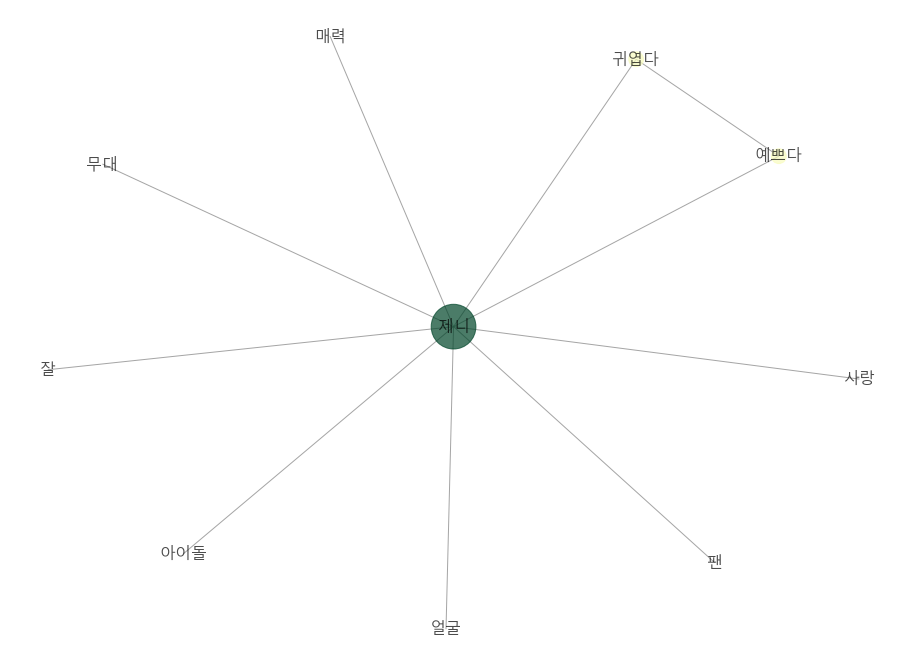

<Figure size 432x288 with 0 Axes>

In [105]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)
plt.show()
plt.savefig('./jenny_in_top100.png', bbox_inches = 'tight')

In [40]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']

In [100]:
top500_word

[['좋은', '제니'],
 ['제니', '외국인', '예쁘다'],
 ['분위기', '컴백', '좋음'],
 [],
 ['머리', '제니'],
 [],
 [],
 ['머리', '제니'],
 ['처음'],
 [],
 ['제니'],
 [],
 ['제니',
  '심장',
  '제니',
  '얼굴',
  '세상',
  '제일',
  '예쁘다',
  '분위기',
  '예쁘다',
  '제니',
  '여신',
  '젠',
  '여신',
  '사랑'],
 ['길이', '옷', '거기', '노래', '날', '분위기', '예쁘다'],
 ['제니', '직캠', '애기'],
 ['노래',
  '노래',
  '제니',
  '보다',
  '모든',
  '노래',
  '노래',
  '길이',
  '어울리는',
  '제일',
  '의상',
  '젤',
  '예쁘다',
  '제니',
  '제니',
  '제니'],
 ['제니', '몸매', '예쁘다', '키', '알았는데', '비율', '좋고', '예쁘다'],
 ['고급', '생긴'],
 ['컴백'],
 ['예쁘다', '사랑'],
 ['예쁘다', '세상', '살', '많은', '뿐'],
 ['핑크', '팬', '노래', '노래'],
 ['세상', '제일', '예쁘다', '울', '제니', '사랑'],
 ['미추리', '보다가', '보'],
 ['항상', '무대', '제니', '눈', '않고', '살짝', '보다', '개성', '좋음'],
 ['모든', '잘', '분위기'],
 ['예쁘다'],
 ['제니', '예쁘다', '제니', '미모', '절대'],
 ['젤', '고급', '져'],
 ['스타일'],
 ['좋은', '노래', '컴백'],
 ['머리', '젤', '보인다'],
 ['제니', '최고', '최고'],
 ['제니', '최고', '예쁘다'],
 ['레전드'],
 ['CHANEL', '예쁘다', '제니', '잘'],
 ['레전드', '항상', '레전드'],
 ['제니', '예쁘다', '하다'],
 ['예쁘다'],
 ['관심', '그녀